# Курсовой проект для курса "Python для Data Science"

Материалы к проекту (файлы):
`train.csv`
`test.csv`

Задание:
Используя данные из `train.csv`, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла `test.csv`.

Целевая переменная:
`Price`

Метрика:
`R2` - коэффициент детерминации (`sklearn.metrics.r2_score`)

## Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Пути к директориям и файлам

In [2]:
DATASET_TRAIN = 'train.csv'
DATASET_VALID = 'test.csv'

## Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

Загрузим данные из датасетов `'train.csv'` и `'test.csv'`

In [3]:
df = pd.read_csv(DATASET_TRAIN)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
df_test = pd.read_csv(DATASET_VALID)
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


## Обработка признаков

In [5]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [6]:
df_test.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [7]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [8]:
df_test.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

Видно, что тренировочный и тестовый датасеты имеют общую структуру.

Посмотрим описание тренировочного датасета.

In [9]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Анализируя данные, я сделал вывод, что показатель местности `Healthcare_1`, связанный с охраной здоровья, зависит сильно от района. Высчитываем средний по району и заполняем пропуски.

Не во всех районах был `Healthcare_1`. Остальные заполняем средним по городу

In [10]:
def replase_Healthcare_1(df):        
    unique_dist_id = df['DistrictId'].unique()

    for i in unique_dist_id:
        df.loc[(df['DistrictId'] == i) & (df['Healthcare_1'].isna()), 'Healthcare_1'] = \
        df.loc[df['DistrictId'] == i, 'Healthcare_1'].mean()

    df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = df['Healthcare_1'].mean()
    
    return df

Исследуя разные способы исправления некорректных записей, я принял решение, что наилучшим вариантом является удаление записей. Их количество менее `8%`, а коэффициент детерминации модели при их удалении выше.

In [11]:
df = df.drop(df[(df['Floor'] > df['HouseFloor']) &
                 df['LifeSquare'].isnull() &
                 df['Healthcare_1'].isnull()].index, axis=0)

df = df.drop(df[(df['Rooms'] > 6) | (df['Rooms'] < 1)].index, axis=0)
df = df.drop(df[(df['Square'] > 300) | (df['Square'] < 17)].index, axis=0)
df = df.drop(df[(df['LifeSquare'] <  15) | 
                (df['LifeSquare'] > 250) |
                (df['LifeSquare'] <  df['KitchenSquare'])].index, axis=0)

Заполняем жилую площадь медианой 

In [12]:
LifeSquare_median = df['LifeSquare'].median()

df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = LifeSquare_median
df_test.loc[df_test['LifeSquare'].isnull(), 'LifeSquare'] = LifeSquare_median

Анализ показал, что кухни больше 30 м2 - это некорректные данные, как и меньше 4 м2

In [13]:
KitchenSquare_median = df['KitchenSquare'].median()

df.loc[(df['KitchenSquare'] > 30) | (df['KitchenSquare'] < 4), 'KitchenSquare'] = KitchenSquare_median
df_test.loc[(df_test['KitchenSquare'] > 30) | (df_test['KitchenSquare'] < 4), 
            'KitchenSquare'] = KitchenSquare_median

Логично, что год постройки больше 2020 - это выброс

In [14]:
HouseYear_median = df['HouseYear'].median()

df.loc[(df['HouseYear'] > 2020) , 'HouseYear'] = HouseYear_median
df_test.loc[(df_test['HouseYear'] > 2020) , 'HouseYear'] = HouseYear_median

Жилая площадь не может быть больше общей  

In [15]:
df.loc[df['LifeSquare'] > df['Square'], 'LifeSquare'] = df['Square']
df_test.loc[df_test['LifeSquare'] > df_test['Square'], 'LifeSquare'] = df_test['Square']

Заполняем `Healthcare_1`.

In [16]:
df = replase_Healthcare_1(df)
df_test = replase_Healthcare_1(df_test)

Идентификационный номер района несет в себе мало смысла, а вот средняя цена за м2 - это признак. Посчитаем среднюю цену за м2 по району и добавим признак в датасет. 

In [17]:
district_mean_price = df.groupby('DistrictId')['Price'].mean()
district_mean_square = df.groupby('DistrictId')['Square'].mean()
dist_price = pd.Series(district_mean_price / district_mean_square)

df = pd.merge(df, dist_price.rename('Dist_sqr_price'), on = 'DistrictId')

In [18]:
df_test = pd.merge(df_test, dist_price.rename('Dist_sqr_price'), on='DistrictId', how='left')
df_test['Dist_sqr_price'].fillna(df_test['Dist_sqr_price'].median(), inplace=True)

## Анализ целевой переменной

Text(0.5, 0, 'price')

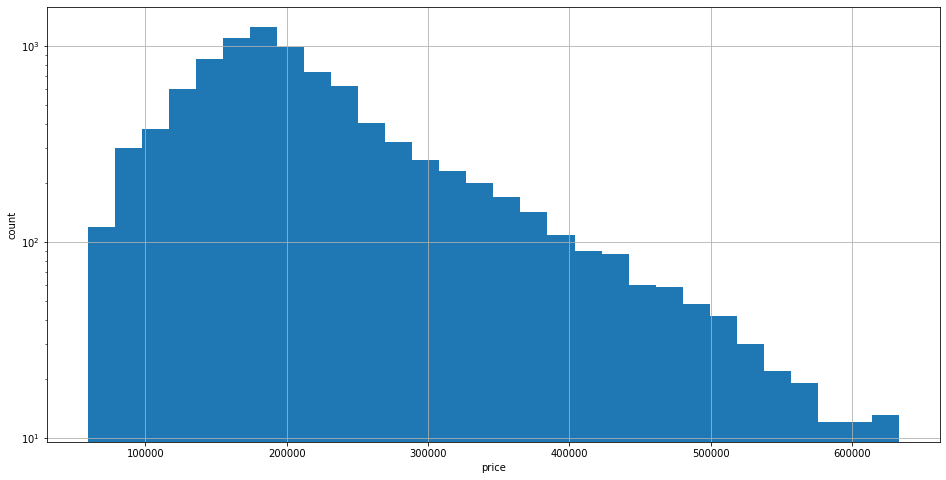

In [19]:
plt.figure(figsize=(16, 8))
df['Price'].hist(bins=30)
plt.yscale(value='log')
plt.ylabel('count')
plt.xlabel('price')

При анализе целевой переменной отклонений не замечено. 

## Матрица корреляций

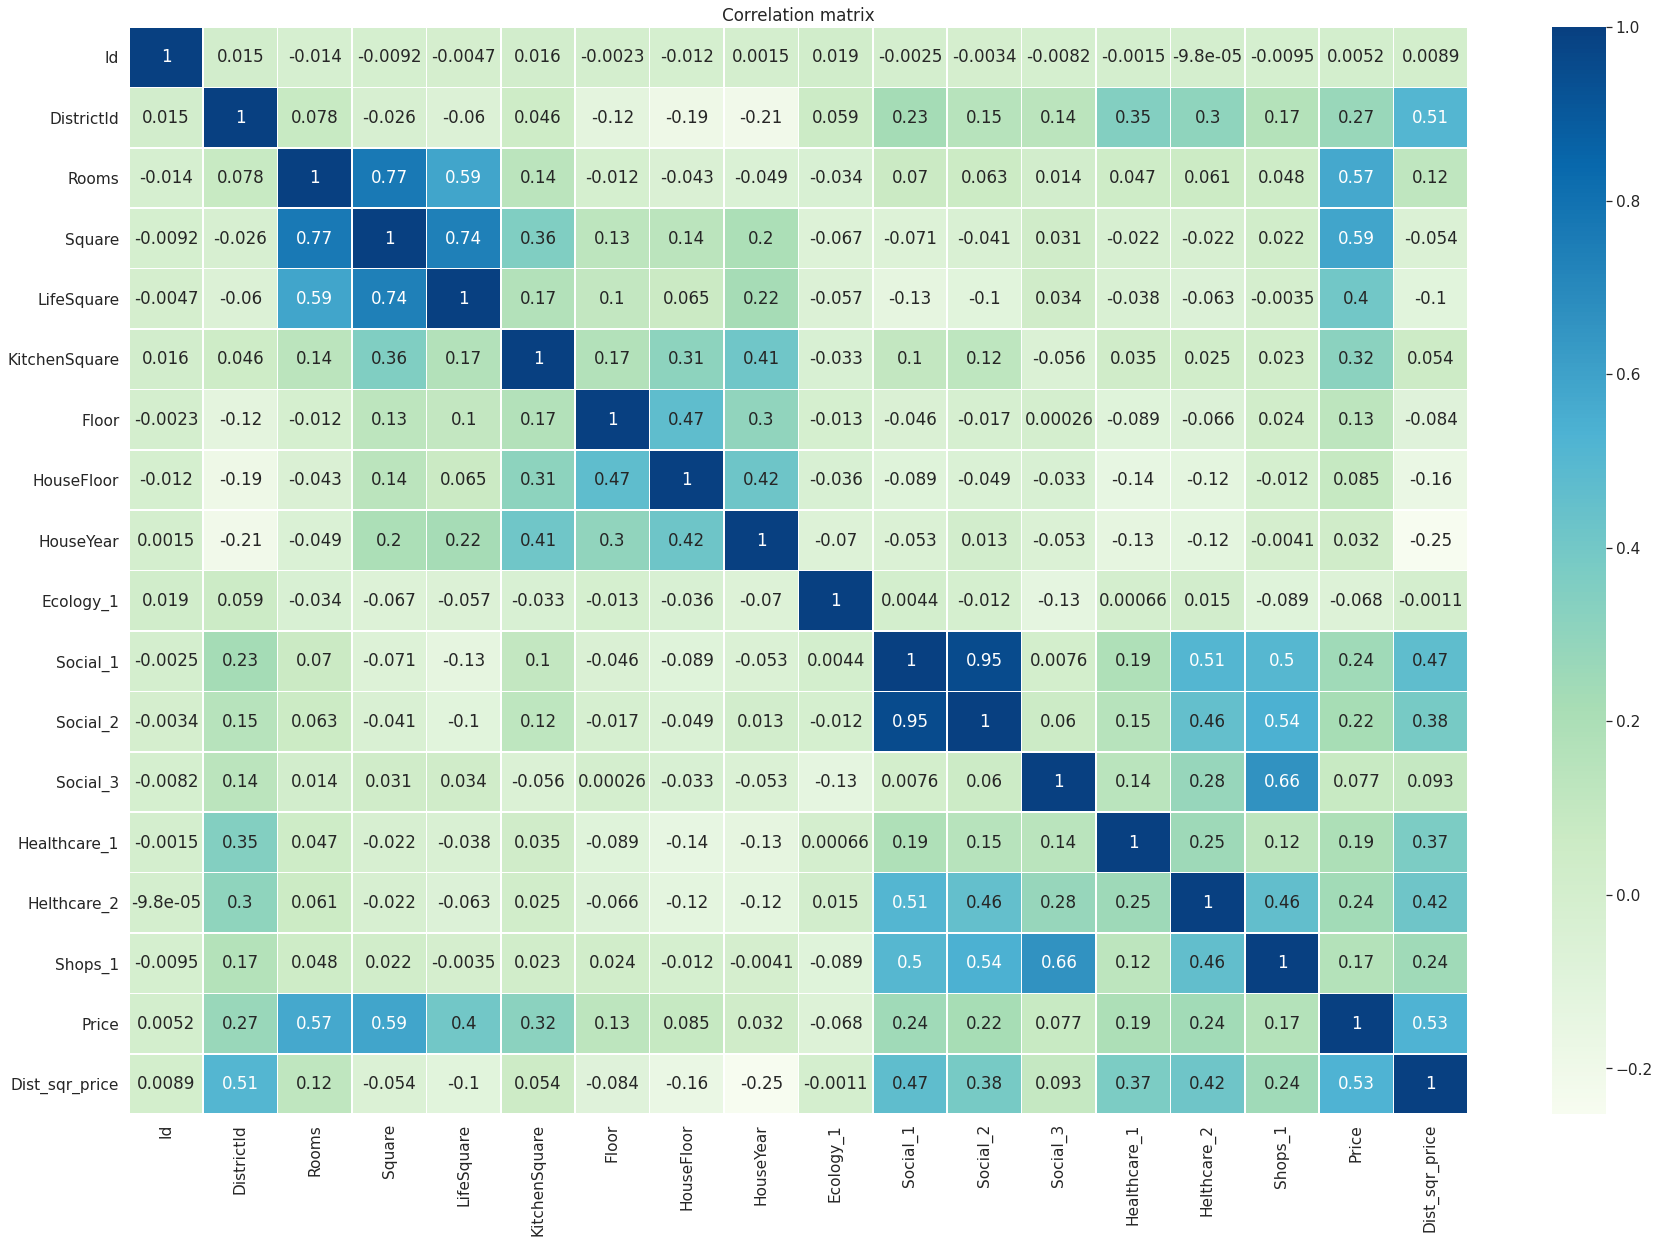

In [20]:
plt.figure(figsize = (30,20))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

## Стандартизация признаков

Видим, что параметр `"Social_1"` сильно коррелирует с `"Social_2"` (0,95). Принято решенеие убрать `"Social_2"`.

In [21]:
feature_names = [
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 #'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Dist_sqr_price',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B'
]

target_name = ['Price']

In [22]:
X = pd.get_dummies(df)
y = X[target_name]
X = X[feature_names]

In [23]:
X_test = pd.get_dummies(df_test)
X_test = X_test[feature_names]

In [24]:
cols_for_scaling = ['Dist_sqr_price', 'Rooms', 'Square', 'LifeSquare', 
                    'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
                    'Ecology_1', 'Social_1', 'Social_3',
                    'Healthcare_1', 'Helthcare_2', 'Shops_1']

scaler = RobustScaler()

scaled_features = scaler.fit_transform(X[cols_for_scaling])
X[cols_for_scaling] = pd.DataFrame(scaled_features, columns=cols_for_scaling)

In [25]:
scaled_features = scaler.transform(X_test[cols_for_scaling])
X_test[cols_for_scaling] = pd.DataFrame(scaled_features, columns=cols_for_scaling)

## Построение модели

### Функция вывода 

In [26]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10)) 
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

В качестве метода машинного обучения был выбран `RandomForestRegressor`. Для того, чтобы выбрать подходящий набор параметров, был использован `Grid search`. Были получены следующие оптимальные параметры:
* `n_estimators` - 600
* `max_features` - 6
* `max_depth` - 45

In [27]:
rfr = RandomForestRegressor(n_estimators=600, 
                            max_features=6,
                            max_depth=45,
                            random_state=42,
                            n_jobs=5)

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True,
                                                      test_size=0.20,
                                                      random_state=42)

In [29]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=45, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=5, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

R2:	0.966
MAE:	10109.113
MSE:	297661716.737


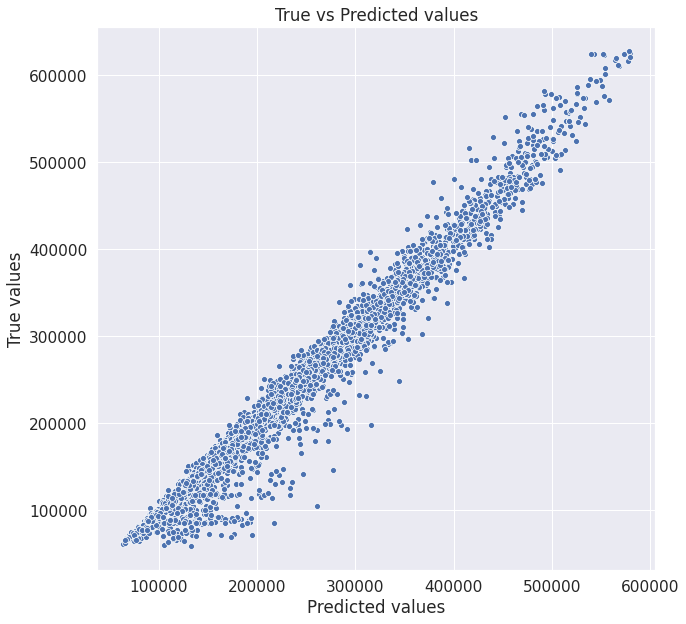

In [30]:
y_train_preds = rfr.predict(X_train)
evaluate_preds(y_train['Price'], y_train_preds)

R2:	0.765
MAE:	26447.277
MSE:	1990822093.15


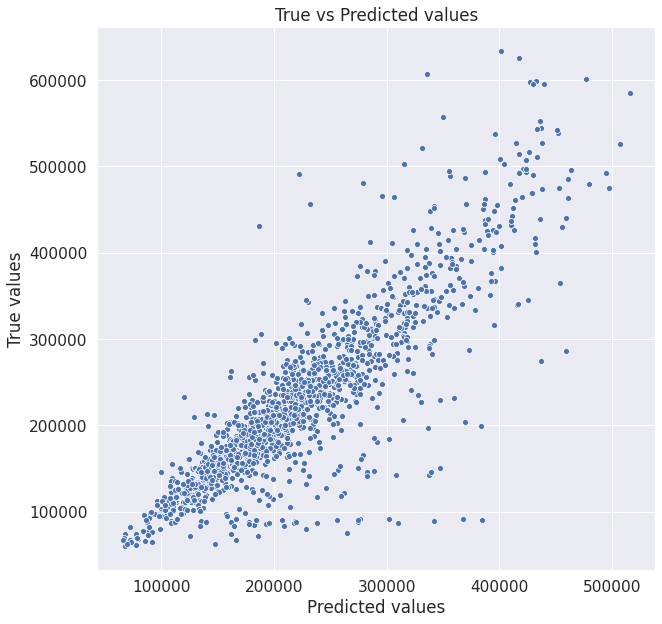

In [31]:
y_valid_preds = rfr.predict(X_valid)
evaluate_preds(y_valid['Price'], y_valid_preds)

Обучим модель на всех данных

In [32]:
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=45, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=5, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

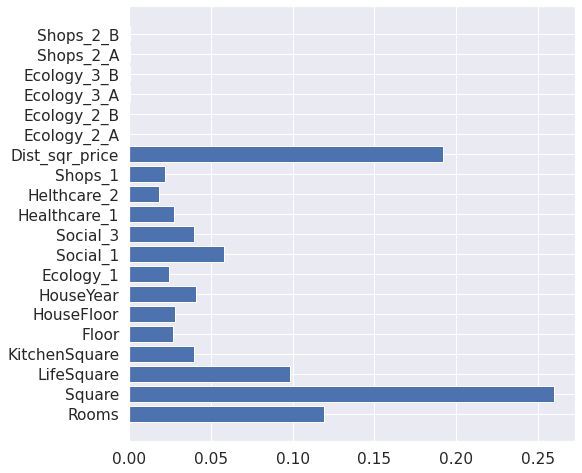

In [33]:
plt.figure(figsize=(8,8))
plt.barh(X.columns, rfr.feature_importances_);

## Сохранение результатов

In [34]:
y_test_pred = rfr.predict(X_test)

In [35]:
df_test['Price'] = y_test_pred

In [36]:
df_test[['Id','Price']].to_csv('AShmetakov_predictions', index = False)